<a href="https://colab.research.google.com/github/eldertec/postgraduate-in-development-full-stack/blob/master/Modulo-ML/wineregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from google.colab import drive

In [40]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ds = pd.read_csv('/content/drive/My Drive/Eldertec/Pós-graduação/Machine Learning/winequality-red.csv', sep=',')

In [42]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
ds.shape

(1599, 12)

In [44]:
ds.isnull().sum().sort_values(ascending = False)

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

In [45]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [46]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


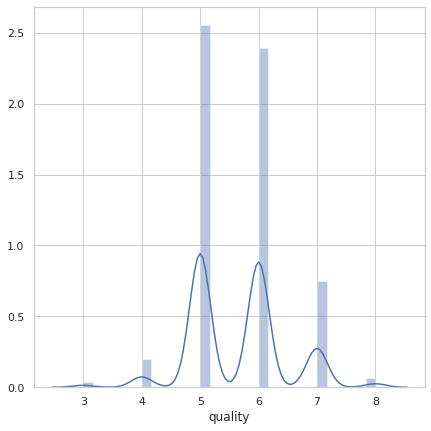

In [47]:
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["quality"])

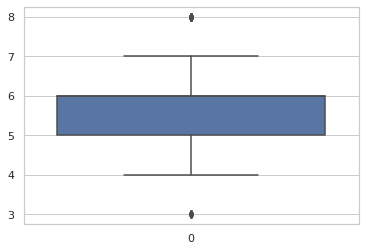

In [48]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=ds["quality"]);

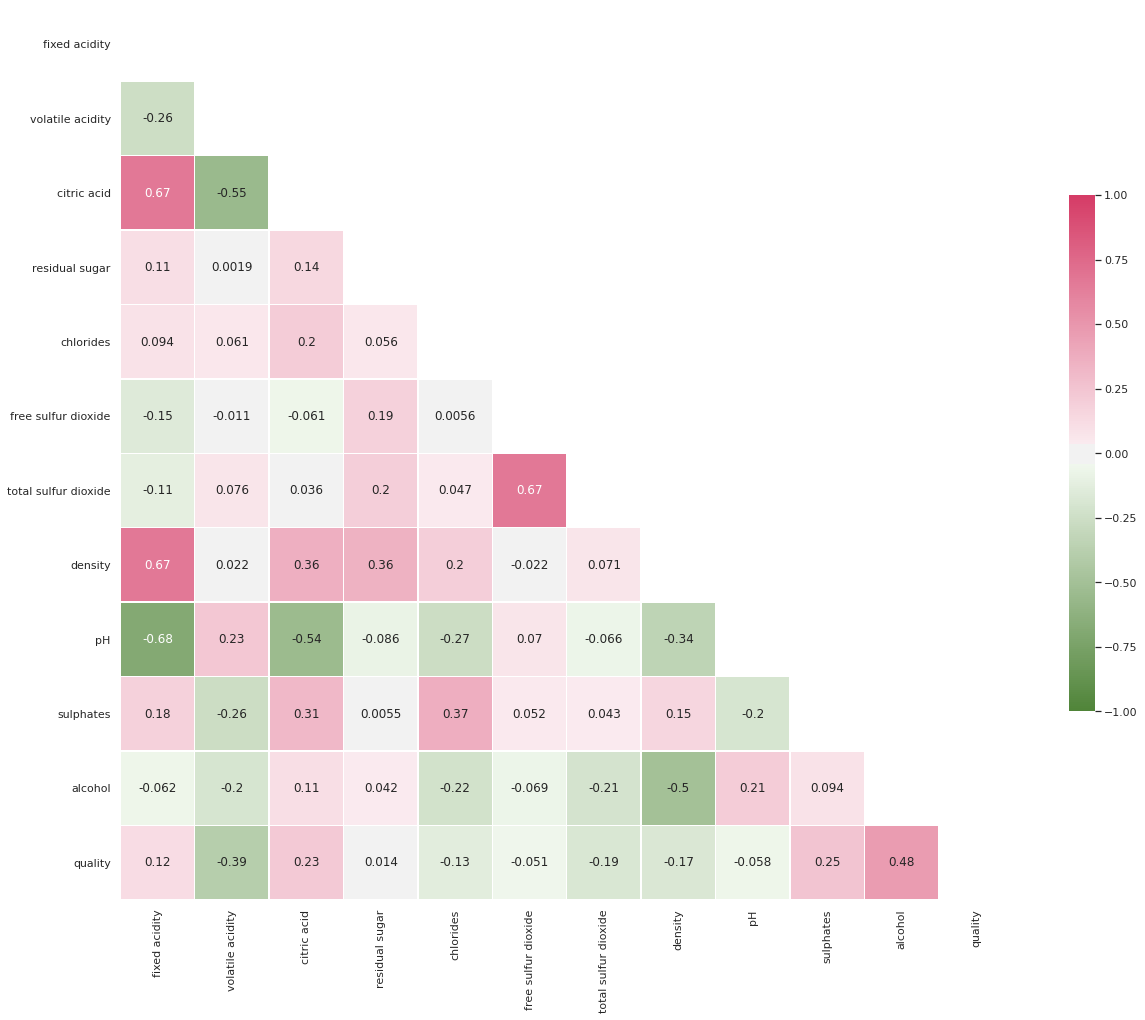

In [49]:
corr = ds.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 19))

cmap = sns.diverging_palette(120, 1, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [50]:
corr = ds.corr()
max_corrs = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(max_corrs)

fixed acidity         citric acid             0.671703
                      density                 0.668047
free sulfur dioxide   total sulfur dioxide    0.667666
alcohol               quality                 0.476166
chlorides             sulphates               0.371260
citric acid           density                 0.364947
residual sugar        density                 0.355283
citric acid           sulphates               0.312770
sulphates             quality                 0.251397
volatile acidity      pH                      0.234937
citric acid           quality                 0.226373
pH                    alcohol                 0.205633
citric acid           chlorides               0.203823
residual sugar        total sulfur dioxide    0.203028
chlorides             density                 0.200632
residual sugar        free sulfur dioxide     0.187049
fixed acidity         sulphates               0.183006
density               sulphates               0.148506
citric aci

In [51]:
for i,y in corr.quality.iteritems():
  print(i + ' ' + str(y))

fixed acidity 0.1240516491132247
volatile acidity -0.3905577802640094
citric acid 0.2263725143180432
residual sugar 0.013731637340066346
chlorides -0.12890655993005315
free sulfur dioxide -0.05065605724427643
total sulfur dioxide -0.18510028892653843
density -0.1749192277833492
pH -0.0577313912053823
sulphates 0.25139707906926206
alcohol 0.47616632400114156
quality 1.0


In [0]:
features = ['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','alcohol']
target = ['quality']

In [0]:
X = ds[features]
y = ds[target]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [55]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
preditorLR = linear.predict(X_test)
print(preditorLR[:5])
print('*'*14)
print(y_test[:5])

[[5.59668501]
 [5.71257549]
 [5.50495467]
 [5.41773189]
 [5.70407342]]
**************
      quality
366         7
1325        6
133         6
1418        5
1258        6


In [57]:
acuracia = sqrt(mean_squared_error(y_true=y_test, y_pred=preditorLR))
print(acuracia)

0.610866210107019


In [58]:
arvore = DecisionTreeRegressor(max_depth=50)
arvore.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [59]:
preditorDT = arvore.predict(X_test)
print(preditorDT[:5])
print('*'*16)
print(y_test[:5])

[7. 6. 5. 6. 6.]
****************
      quality
366         7
1325        6
133         6
1418        5
1258        6


In [60]:
acuracia = sqrt(mean_squared_error(y_true=y_test, y_pred=preditorDT))
print(acuracia)

0.7231297716638879


In [61]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [65]:
preditorKnn = knn.predict(X_test)
print(preditorKnn[:5])
print('*'*14)
print(y_test[:5])

[[6.33333333]
 [5.66666667]
 [5.        ]
 [5.        ]
 [6.66666667]]
**************
      quality
366         7
1325        6
133         6
1418        5
1258        6


In [66]:
acuracia = sqrt(mean_squared_error(y_true=y_test, y_pred=preditorKnn))
print(acuracia)

0.7282335299023754
